In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder

from sklearn import metrics, svm

from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report

from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import GaussianNB


from sklearn.ensemble import RandomForestClassifier, BaggingClassifier,AdaBoostClassifier, GradientBoostingClassifier,VotingClassifier

from sklearn.metrics import confusion_matrix,classification_report,recall_score,accuracy_score,precision_score

from sklearn.linear_model import Ridge

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.decomposition import PCA

from tabulate import tabulate

import joblib
from xgboost import XGBClassifier
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/Alternative_Data/application_train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/Alternative_Data/application_test.csv")

## EDA

In [ ]:
df = train_df[train_df['CODE_GENDER'] != 'XNA']
df = test_df[test_df['CODE_GENDER'] != 'XNA']

In [ ]:
train_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


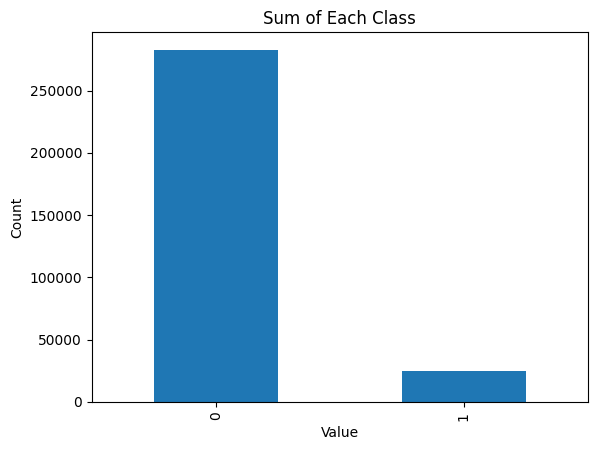

In [ ]:
classes_sum = train_df['TARGET'].value_counts()

classes_sum.plot(kind='bar')
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Sum of Each Class')
plt.show()

In [ ]:
count_class_one = train_df['TARGET'].eq(1).sum()
count_class_one

24825

In [ ]:
class_zero = train_df[train_df['TARGET'] == 0].sample(24825)
class_one = train_df[train_df['TARGET'] == 1].sample(24825)

balanced_df = pd.concat([class_zero, class_one])
balanced_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
71466,182879,0,Cash loans,F,N,Y,0,202500.0,733500.0,21577.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
96697,212252,0,Cash loans,F,N,Y,0,360000.0,1256400.0,33273.0,...,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
15153,117697,0,Cash loans,F,N,Y,0,85500.0,177903.0,12510.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
171415,298661,0,Cash loans,F,N,N,0,126000.0,760225.5,30150.0,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,0.0
255364,395479,0,Revolving loans,M,N,Y,2,630000.0,675000.0,33750.0,...,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


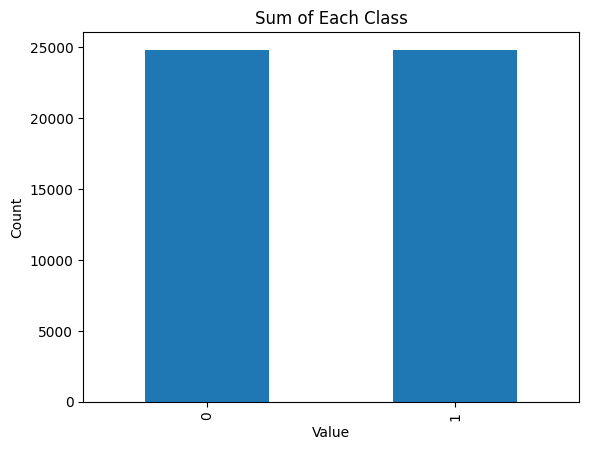

In [ ]:
classes_sum = balanced_df['TARGET'].value_counts()

classes_sum.plot(kind='bar')
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Sum of Each Class')
plt.show()

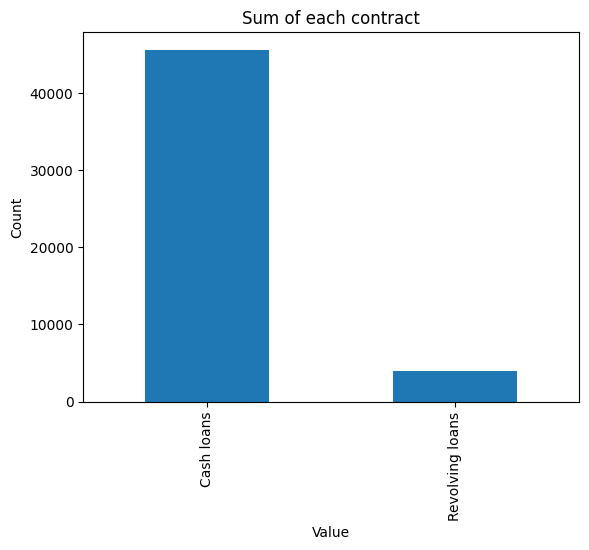

In [ ]:
classes_sum = balanced_df['NAME_CONTRACT_TYPE'].value_counts()

classes_sum.plot(kind='bar')
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Sum of each contract')
plt.show()

In [ ]:
# UNUSED_FEATURES = ['NAME_CONTRACT_TYPE', 'SK_ID_CURR', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
#                    'WALLSMATERIAL_MODE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
#                    'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
#                    'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
#                    'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
#                    'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
#                    'FLAG_DOCUMENT_21']

# CATEGORICAL_FEATURES = ['NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
#                         'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE']

# NUMERICAL_FEATURES = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
#                       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
#                       'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
#                       'REGION_RATING_CLIENT_W_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
#                       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG',
#                       'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
#                       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
#                       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
#                       'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE',
#                       'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
#                       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
#                       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
#                       'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
#                       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',
#                       'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
#                       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
#                       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
#                       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

# CYCLICAL_FEATURES = ['WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START']

# YES_NO_FEATURES = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'EMERGENCYSTATE_MODE']

# BINARY_FEATURES = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REG_REGION_NOT_LIVE_REGION',
#                    'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

In [ ]:
UNUSED_FEATURES = ['NAME_CONTRACT_TYPE', 'SK_ID_CURR', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
                   'WALLSMATERIAL_MODE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
                   'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
                   'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
                   'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
                   'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
                   'FLAG_DOCUMENT_21',
                   'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG',
                   'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
                   'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
                   'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
                   'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE',
                   'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
                   'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
                   'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
                   'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
                   'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',
                   'TOTALAREA_MODE']

CATEGORICAL_FEATURES = ['NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
                        'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE']

NUMERICAL_FEATURES = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
                      'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
                      'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
                      'REGION_RATING_CLIENT_W_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
                      'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
                      'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                      'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

CYCLICAL_FEATURES = ['WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START']

YES_NO_FEATURES = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'EMERGENCYSTATE_MODE']

BINARY_FEATURES = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REG_REGION_NOT_LIVE_REGION',
                   'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

In [ ]:
# for col in CATEGORICAL_FEATURES:
#   classes_sum = balanced_df[col].value_counts()

#   classes_sum.plot(kind='bar')
#   plt.xlabel('Value')
#   plt.ylabel('Count')
#   plt.title(f'Sum of each {col}')
#   plt.show()

In [ ]:
balanced_df = balanced_df.drop(UNUSED_FEATURES, axis=1)
balanced_df = balanced_df.drop(BINARY_FEATURES, axis=1)
y = balanced_df['TARGET']
X = balanced_df.drop(columns=['TARGET'], axis=1)

In [ ]:
balanced_df.head()

,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
71466,0,F,N,Y,0,202500.0,733500.0,21577.5,733500.0,Unaccompanied,...,0.0,0.0,0.0,-269.0,0.0,0.0,0.0,1.0,0.0,1.0
96697,0,F,N,Y,0,360000.0,1256400.0,33273.0,900000.0,Unaccompanied,...,0.0,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0
15153,0,F,N,Y,0,85500.0,177903.0,12510.0,148500.0,Unaccompanied,...,0.0,0.0,0.0,-806.0,0.0,0.0,0.0,0.0,0.0,3.0
171415,0,F,N,N,0,126000.0,760225.5,30150.0,679500.0,Unaccompanied,...,0.0,0.0,0.0,-420.0,0.0,0.0,0.0,0.0,2.0,0.0
255364,0,M,N,Y,2,630000.0,675000.0,33750.0,675000.0,Unaccompanied,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Data Splitting

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
X_train.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
304820,M,N,Y,0,103500.0,573408.0,20727.0,495000.0,Unaccompanied,Working,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
228594,F,N,N,0,135000.0,526491.0,22261.5,454500.0,Other_A,Pensioner,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
296979,F,Y,Y,0,202500.0,970380.0,28503.0,810000.0,Family,Commercial associate,...,1.0,2.0,1.0,-2071.0,0.0,0.0,0.0,0.0,0.0,4.0
25464,M,Y,Y,0,315000.0,254700.0,25321.5,225000.0,Unaccompanied,Commercial associate,...,0.0,0.0,0.0,-695.0,0.0,0.0,0.0,0.0,0.0,6.0
181500,F,N,N,0,180000.0,1078200.0,34780.5,900000.0,Unaccompanied,Working,...,0.0,0.0,0.0,-230.0,NaN,NaN,NaN,NaN,NaN,NaN


# Ridge Regression Filler

In [ ]:
# Fill EXT_SOURCE_1 given EXT_SOURCE_2 and EXT_SOURCE_3

data = X.loc[:, ["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"]].dropna()
x_filler = data.drop(columns="EXT_SOURCE_1")
y_filler = data["EXT_SOURCE_1"]

scaler = StandardScaler()
x_filler_scaled = scaler.fit_transform(x_filler)

reg_model = Ridge(alpha=0.001)
reg_model.fit(x_filler_scaled, y_filler)

mask = (~(X["EXT_SOURCE_2"].isna())) & (~(X["EXT_SOURCE_3"].isna())) & (X["EXT_SOURCE_1"].isna())
x_pred = X.loc[mask,["EXT_SOURCE_2", "EXT_SOURCE_3"]]
x_pred_scaled = scaler.transform(x_pred)
X.loc[mask,"EXT_SOURCE_1"] = reg_model.predict(x_pred_scaled)

In [ ]:
# Fill EXT_SOURCE_3 given EXT_SOURCE_2 and EXT_SOURCE_1
data = X.loc[:, ["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"]].dropna()
x_filler = data.drop(columns="EXT_SOURCE_3")
y_filler = data["EXT_SOURCE_3"]

scaler = StandardScaler()
x_filler_scaled = scaler.fit_transform(x_filler)

reg_model = Ridge(alpha=0.001)
reg_model.fit(x_filler_scaled, y_filler)

mask = (~(X["EXT_SOURCE_2"].isna())) & (~(X["EXT_SOURCE_1"].isna())) & (X["EXT_SOURCE_3"].isna())
x_pred = X.loc[mask,["EXT_SOURCE_1", "EXT_SOURCE_2"]]
x_pred_scaled = scaler.transform(x_pred)
X.loc[mask,"EXT_SOURCE_3"] = reg_model.predict(x_pred_scaled)

## Mapping Features

In [ ]:
def map_features(df):
    mapping_YN = {'N': 0, 'Y': 1, 'No': 0, 'Yes': 1}
    mapping_gender = {'M': 0, 'F': 1}

    for col in YES_NO_FEATURES:
        df[col] = df[col].map(mapping_YN).fillna(0).astype(float).astype(int)

    df['CODE_GENDER'] = df['CODE_GENDER'].map(mapping_gender).fillna(0).astype(float).astype(int)
    df['EMERGENCYSTATE_MODE'] = df['EMERGENCYSTATE_MODE'].fillna(0).astype(float).astype(int)

    return df


In [ ]:
X_train = map_features(X_train)
X_test = map_features(X_test)

## One Hot Encoding

In [ ]:
def one_hot_encoding(encoder, df, isTrain):
    # Create a copy of the DataFrame to work with
    encoded_df = df.copy()

    # Fill missing values in categorical features
    encoded_df[CATEGORICAL_FEATURES] = encoded_df[CATEGORICAL_FEATURES].apply(lambda x: x.fillna(x.mode()[0]), axis=0)

    if isTrain:
        encoded = encoder.fit_transform(encoded_df[CATEGORICAL_FEATURES])
    else:
        encoded = encoder.transform(encoded_df[CATEGORICAL_FEATURES])

    feature_names = encoder.get_feature_names_out()

    # Create a new DataFrame with encoded values
    ohe_df = pd.DataFrame(encoded.toarray(), columns=feature_names)
    ohe_df = ohe_df.astype(int)

    # Drop the categorical features from the encoded DataFrame
    encoded_df = encoded_df.drop(columns=CATEGORICAL_FEATURES)

    # Reset indices of the DataFrames
    encoded_df.reset_index(drop=True, inplace=True)
    ohe_df.reset_index(drop=True, inplace=True)

    # Concatenate the encoded DataFrame with the remaining features
    return pd.concat([encoded_df, ohe_df], axis=1)

In [ ]:
ohe = OneHotEncoder(handle_unknown='ignore')  # Set handle_unknown to 'ignore'

X_train = one_hot_encoding(ohe, X_train, True)
X_test = one_hot_encoding(ohe, X_test, False)

# Save the OneHotEncoder model
joblib.dump(ohe, '/content/sample_data/onehotencoder.joblib')

['/content/sample_data/onehotencoder.joblib']

In [ ]:
X_train.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,0,0,1,0,103500.0,573408.0,20727.0,495000.0,0.010966,-11958,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,135000.0,526491.0,22261.5,454500.0,0.004960,-17134,...,0,0,0,0,0,0,0,0,0,1
2,1,1,1,0,202500.0,970380.0,28503.0,810000.0,0.031329,-18383,...,0,0,0,0,0,0,0,0,0,0
3,0,1,1,0,315000.0,254700.0,25321.5,225000.0,0.007274,-24000,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,180000.0,1078200.0,34780.5,900000.0,0.006629,-16701,...,0,0,0,0,0,0,0,0,0,0


## Scaling Features




In [ ]:
def scale_numerical_features(scaler, df, isTrain):
    # Create a copy of the DataFrame to work with
    scaled_df = df.copy()

    # Fill missing values in numerical features
    scaled_df[NUMERICAL_FEATURES] = scaled_df[NUMERICAL_FEATURES].apply(lambda x: x.fillna(x.median()),axis=0)


    if isTrain:
        scaled_features = scaler.fit_transform(scaled_df[NUMERICAL_FEATURES])
    else:
        scaled_features = scaler.transform(scaled_df[NUMERICAL_FEATURES])

    # Create a new DataFrame with scaled values
    scaled_features_df = pd.DataFrame(scaled_features, columns=NUMERICAL_FEATURES)

    # Drop the numerical features from the scaled DataFrame
    scaled_df = scaled_df.drop(columns=NUMERICAL_FEATURES)

    # Reset indices of the DataFrames
    scaled_df.reset_index(drop=True, inplace=True)
    scaled_features_df.reset_index(drop=True, inplace=True)

    # Concatenate the scaled DataFrame with the remaining features
    return pd.concat([scaled_df, scaled_features_df], axis=1)

In [ ]:
scaler = StandardScaler()

X_train = scale_numerical_features(scaler, X_train, isTrain=True)
X_test = scale_numerical_features(scaler, X_test, isTrain=False)

# Save the OneHotEncoder model
joblib.dump(ohe, '/content/sample_data/standardscaler.joblib')

['/content/sample_data/standardscaler.joblib']

In [ ]:
X_train.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,EMERGENCYSTATE_MODE,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,0,1,MONDAY,17,0,0,0,0,0,...,-0.347730,-0.618913,-0.300450,1.123199,-0.073435,-0.067368,-0.156925,-0.270322,-0.378945,-0.549151
1,1,0,0,TUESDAY,11,0,0,0,0,1,...,-0.347730,-0.618913,-0.300450,1.123199,-0.073435,-0.067368,-0.156925,-0.270322,-0.378945,-1.121502
2,1,1,1,FRIDAY,13,0,0,1,0,0,...,1.755488,0.237064,2.263219,-1.468915,-0.073435,-0.067368,-0.156925,-0.270322,-0.378945,1.167901
3,0,1,1,SATURDAY,10,0,0,0,0,0,...,-0.347730,-0.618913,-0.300450,0.253320,-0.073435,-0.067368,-0.156925,-0.270322,-0.378945,2.312603
4,1,0,0,MONDAY,11,0,0,0,0,0,...,-0.347730,-0.618913,-0.300450,0.835326,-0.073435,-0.067368,-0.156925,-0.270322,-0.378945,0.023200


## Cyclic Encoding

In [ ]:
def day_encoder(df):
  mapping = {'MONDAY': 1, 'TUESDAY': 2, 'WEDNESDAY': 3, 'THURSDAY': 4, 'FRIDAY': 5, 'SATURDAY': 6, 'SUNDAY': 7}

  df['WEEKDAY_APPR_PROCESS_START'] = df['WEEKDAY_APPR_PROCESS_START'].map(mapping)

  df['DAY_WEEK_SIN'] = np.sin(df['WEEKDAY_APPR_PROCESS_START'] * (2 * np.pi / 7))
  df['DAY_WEEK_COS'] = np.cos(df['WEEKDAY_APPR_PROCESS_START'] * (2 * np.pi / 7))

  df = df.drop(columns=['WEEKDAY_APPR_PROCESS_START'])
  return df

In [ ]:
X_train = day_encoder(X_train)
X_test = day_encoder(X_test)

In [ ]:
def hour_encoder(df):

  # Convert the hour (in 24h format) to a number between 0 and 1, and multiply it by 2*pi to convert it to radians
  df['HOUR_APPR_PROCESS_START_rad'] = df['HOUR_APPR_PROCESS_START'] / 24. * 2 * np.pi

  # Create the two new features using sine and cosine
  df['HOUR_APPR_PROCESS_START_sin'] = np.sin(df['HOUR_APPR_PROCESS_START_rad'])
  df['HOUR_APPR_PROCESS_START_cos'] = np.cos(df['HOUR_APPR_PROCESS_START_rad'])

  # Drop the original 'HOUR_APPR_PROCESS_START' column and the intermediary radians column
  df = df.drop(['HOUR_APPR_PROCESS_START_rad'], axis=1)

  return df

In [ ]:
X_train = hour_encoder(X_train)
X_test = hour_encoder(X_test)

## Pre-Process Result

In [ ]:
X_train.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,HOUR_APPR_PROCESS_START,EMERGENCYSTATE_MODE,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,...,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAY_WEEK_SIN,DAY_WEEK_COS,HOUR_APPR_PROCESS_START_sin,HOUR_APPR_PROCESS_START_cos
0,0,0,1,17,0,0,0,0,0,0,...,-0.073435,-0.067368,-0.156925,-0.270322,-0.378945,-0.549151,0.781831,0.623490,-0.965926,-0.258819
1,1,0,0,11,0,0,0,0,1,0,...,-0.073435,-0.067368,-0.156925,-0.270322,-0.378945,-1.121502,0.974928,-0.222521,0.258819,-0.965926
2,1,1,1,13,0,0,1,0,0,0,...,-0.073435,-0.067368,-0.156925,-0.270322,-0.378945,1.167901,-0.974928,-0.222521,-0.258819,-0.965926
3,0,1,1,10,0,0,0,0,0,0,...,-0.073435,-0.067368,-0.156925,-0.270322,-0.378945,2.312603,-0.781831,0.623490,0.500000,-0.866025
4,1,0,0,11,0,0,0,0,0,0,...,-0.073435,-0.067368,-0.156925,-0.270322,-0.378945,0.023200,0.781831,0.623490,0.258819,-0.965926


## SVM Model Creation

In [ ]:
# Define the SVM model
svm_model = svm.LinearSVC()

# Train the model with our training data
svm_model.fit(X_train, y_train)


LinearSVC()

In [ ]:
# Use the trained model to make predictions on the test data
y_pred = svm_model.predict(X_test)

# Print a classification report to see the performance of the model on the test data
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.72      0.69      4965
           1       0.69      0.64      0.67      4965

    accuracy                           0.68      9930
   macro avg       0.68      0.68      0.68      9930
weighted avg       0.68      0.68      0.68      9930



In [ ]:
# Generate the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_mat)

Confusion Matrix:
[[3555 1410]
 [1768 3197]]


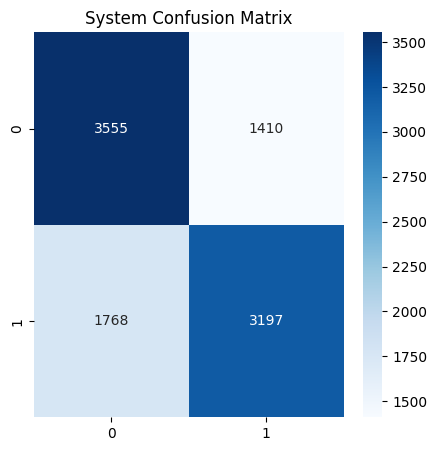

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('System Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

# Assume y_test are your true binary labels (0, 1) and y_pred are your model's predictions
roc_auc = roc_auc_score(y_test, y_pred)

print(f"ROC AUC: {roc_auc}")

ROC AUC: 0.6799597180261833


## XGBoost Model Creation

In [ ]:
# Create an instance of the XGBoost model
model = xgb.XGBClassifier(use_label_encoder=False,
                          objective='binary:logistic',
                          eval_metric='logloss',
                          n_estimators=100,
                          max_depth=5,
                          min_child_weight=1,
                          gamma=0.1,
                          subsample=0.8,
                          colsample_bytree=0.8,
                          learning_rate=0.1)

# Fit the model to the training data
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.1, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [ ]:
# Evaluate model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate the accuracy
accuracy = float(np.sum(y_pred==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.70      0.70      4965
           1       0.70      0.69      0.69      4965

    accuracy                           0.69      9930
   macro avg       0.69      0.69      0.69      9930
weighted avg       0.69      0.69      0.69      9930

Confusion Matrix:
[[3466 1499]
 [1542 3423]]
accuracy: 0.693756


In [ ]:
# Assume y_test are your true binary labels (0, 1) and y_pred are your model's predictions
roc_auc = roc_auc_score(y_test, y_pred)

print(f"ROC AUC: {roc_auc}")

ROC AUC: 0.6937562940584088


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(n_estimators=100,      # Number of trees
                             max_features='sqrt',  # Number of features for each tree
                             max_depth=10,         # Maximum depth of the tree
                             min_samples_split=2,  # Minimum samples for node split
                             min_samples_leaf=1,   # Minimum samples at each leaf node
                             bootstrap=True,       # Whether to use bootstrap samples
                             random_state=42)      # Random state for reproducibility


# Fit the model to the training data
clf.fit(X_train, y_train)

# Make predictions using the trained model and test data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100}%")


Test Accuracy: 68.14702920443102%


In [ ]:
# Make predictions using the trained model and test data
y_pred = clf.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[3345 1620]
 [1543 3422]]


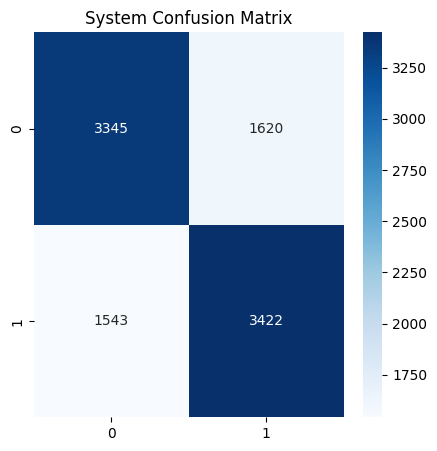

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('System Confusion Matrix')
plt.show()

In [ ]:
# Assume y_test are your true binary labels (0, 1) and y_pred are your model's predictions
roc_auc = roc_auc_score(y_test, y_pred)

print(f"ROC AUC: {roc_auc}")

ROC AUC: 0.6814702920443102


## Neural Nwtwork

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Assuming input_shape is the number of features in X_train
input_shape = X_train.shape[1]

# Define the Neural Network model
model = Sequential()

# Add an input layer and a hidden layer with 32 neurons
model.add(Dense(32, activation='relu', input_shape=(input_shape,)))

# Add another hidden layer with 16 neurons
model.add(Dense(16, activation='relu'))

# Add an output layer with 1 neuron (binary classification)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# Save the model
model.save('/content/sample_data/neural_network_model.h5')


Epoch 1/20
1242/1242 [==============================] - 10s 4ms/step - loss: 0.6149 - accuracy: 0.6646 - val_loss: 0.5998 - val_accuracy: 0.6785
Epoch 2/20
1242/1242 [==============================] - 4s 3ms/step - loss: 0.5970 - accuracy: 0.6808 - val_loss: 0.5972 - val_accuracy: 0.6837
Epoch 3/20
1242/1242 [==============================] - 3s 2ms/step - loss: 0.5933 - accuracy: 0.6854 - val_loss: 0.6000 - val_accuracy: 0.6814
Epoch 4/20
1242/1242 [==============================] - 3s 2ms/step - loss: 0.5899 - accuracy: 0.6860 - val_loss: 0.5963 - val_accuracy: 0.6825
Epoch 5/20
1242/1242 [==============================] - 3s 2ms/step - loss: 0.5868 - accuracy: 0.6893 - val_loss: 0.5946 - val_accuracy: 0.6826
Epoch 6/20
1242/1242 [==============================] - 3s 3ms/step - loss: 0.5842 - accuracy: 0.6904 - val_loss: 0.5965 - val_accuracy: 0.6841
Epoch 7/20
1242/1242 [==============================] - 4s 3ms/step - loss: 0.5815 - accuracy: 0.6942 - val_loss: 0.5964 - val_accuracy

311/311 [==============================] - 0s 1ms/step


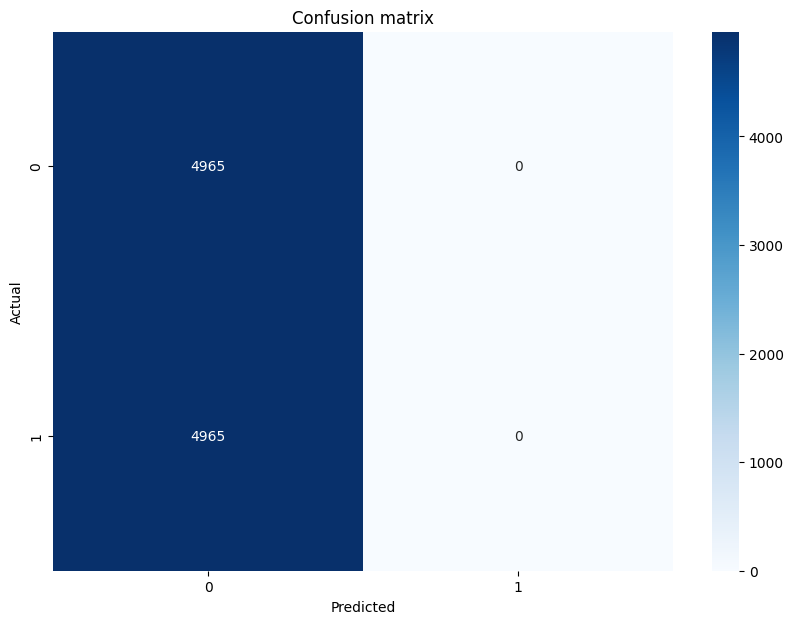

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Make predictions on the testing data
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Convert the confusion matrix to a dataframe - this is necessary for the heatmap
cm_df = pd.DataFrame(cm)

# Create a heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
